In [1]:
import astropy.io.fits as fits
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import warnings

In [2]:
import sys
sys.path.insert(0, '../')

from dynamical_model import DynamicalModel

In [3]:
## default values to test with
r_eff = 1.85
theta_e = 1.63
gamma = 1.95

## check MGE decomposition

In [4]:
dyn = DynamicalModel(mass_model='composite', n_gauss=20, mass_profile_min=10**-3.5, mass_profile_max=100)
dyn_pl = DynamicalModel(mass_model='powerlaw', n_gauss=20, mass_profile_min=10**-2.5, mass_profile_max=100)

Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`


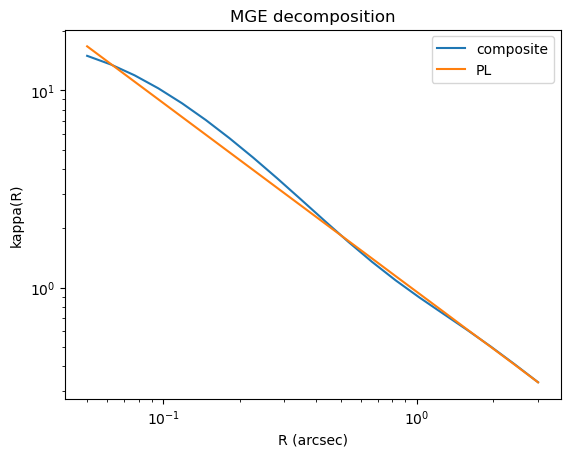

In [5]:
amp, sigma, qs = dyn.get_mass_mge([5.49489633e-02, 2.14856643e+01, 2.01093181e+00, 7.31653932e-01],
                                 )

rs = np.logspace(np.log10(0.05), np.log10(3), 20)

profile = 0.
for a, s in zip(amp, sigma):
    profile += a  * np.exp(-rs**2/2/s**2) * 1e12 / dyn.lens_cosmo.sigma_crit
    
plt.loglog(rs, profile, label='composite')


amp, sigma, _ = dyn_pl.get_mass_mge([1.63445014e+00, 1.95743119e+00, 7.61627596e-01])

profile = 0.
for a, s in zip(amp, sigma):
    profile += a  * np.exp(-rs**2/2/s**2) * 1e12 / dyn.lens_cosmo.sigma_crit
    
plt.loglog(rs, profile, label='PL')
plt.title('MGE decomposition')
plt.xlabel('R (arcsec)')
plt.ylabel('kappa(R)')
plt.legend()

Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`


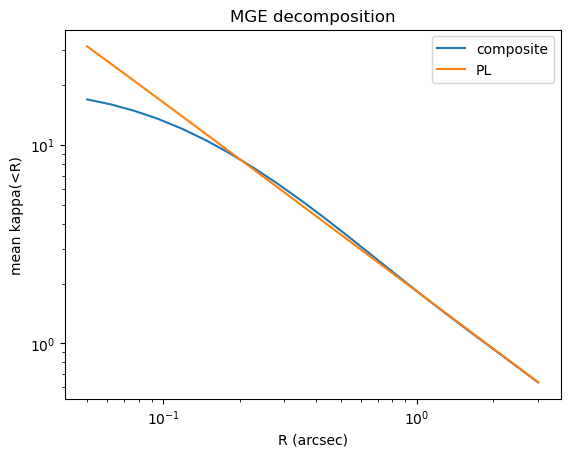

In [6]:
amp, sigma, qs = dyn.get_mass_mge([5.49489633e-02, 2.14856643e+01, 2.01093181e+00, 7.31653932e-01])

rs = np.logspace(np.log10(0.05), np.log10(3), 20)

profile_1 = 0.
for a, s in zip(amp, sigma):
    profile_1 += a * s * (1. - np.exp(-rs**2/2/s**2)) / rs**2 * np.sqrt(2/np.pi) * (np.sqrt(2 * np.pi) * s)  * 1e12 / dyn.lens_cosmo.sigma_crit
    
#plt.loglog(rs, profile)


amp, sigma, _ = dyn_pl.get_mass_mge([1.63445014e+00, 1.95743119e+00, 7.61627596e-01])


profile_2 = 0.
for a, s in zip(amp, sigma):
    profile_2 += a * s * (1. - np.exp(-rs**2/2/s**2)) / rs**2 * np.sqrt(2/np.pi) * (np.sqrt(2 * np.pi) * s)  * 1e12 / dyn.lens_cosmo.sigma_crit
    
#plt.loglog(rs, profile)
plt.loglog(rs, profile_1, label='composite')
plt.loglog(rs, profile_2, label='PL')
plt.title('MGE decomposition')
plt.xlabel('R (arcsec)')
plt.ylabel('mean kappa(<R)')
plt.legend()

## check model parameter definition

In [15]:
from lenstronomy.LensModel.lens_model import LensModel
from lenstronomy.Util.param_util import phi_q2_ellipticity
from lenstronomy.Analysis.lens_profile import LensProfileAnalysis

lens_model_nfw = LensModel(['NFW_ELLIPSE', 'NIE', 'NIE', 'NIE', 'NIE'])
lens_profile_nfw = LensProfileAnalysis(lens_model_nfw)

e1, e2 = phi_q2_ellipticity(0, 7.31653932e-01)
f1, f2 = phi_q2_ellipticity(0, 0.882587)
g1, g2 = phi_q2_ellipticity(0, 0.847040)

kappa_s, r_s, mass_to_light, q = 5.49489633e-02, 2.14856643e+01, 2.01093181e+00, 7.31653932e-01
alpha_rs = 4 * kappa_s * r_s * (np.log(0.5) + 1.)

kwargs_nfw = [{'Rs': r_s, 'alpha_Rs': alpha_rs, 'center_x': 0., 'center_y': 0., 
               'e1': e1, 'e2': e2
              },
              {'theta_E': mass_to_light * 5.409 * (0.882587), 's_scale': 2.031239,
                 'e1': f1, 'e2': f2, 'center_x': 0., 'center_y': 0.},
              {'theta_E': -mass_to_light * 5.409 * (0.882587), 's_scale': 2.472729,
                 'e1': f1, 'e2': f2, 'center_x': 0., 'center_y': 0.},
              {'theta_E': mass_to_light * 1.26192 * (0.847040), 's_scale': 0.063157,
                 'e1': g1, 'e2': g2, 'center_x': 0., 'center_y': 0.},
              {'theta_E': -mass_to_light * 1.26192 * (0.847040), 's_scale': 0.667333,
                 'e1': g1, 'e2': g2, 'center_x': 0., 'center_y': 0.},
            ]

print(lens_model_nfw.alpha(1.63445014e+00, 0, kwargs_nfw))

lens_profile_nfw.effective_einstein_radius(kwargs_nfw, grid_spacing=0.01, grid_num=1000)

(array(1.47574711), array(0.))


1.615807903951976

In [16]:
lens_model = LensModel(['PEMD'])
lens_profile = LensProfileAnalysis(lens_model)

e1, e2 = phi_q2_ellipticity(0, 7.61627596e-01)
theta_e, gamma, q = [1.63445014e+00, 1.95743119e+00, 7.61627596e-01]

kwargs_lens = [
                {'theta_E': theta_e, 'gamma': gamma, 'e1': e1, 'e2': e2,
                 'center_x': 0., 'center_y': 0.}]

lens_model.alpha(1.63445014e+00, 0, kwargs_lens)
lens_profile.effective_einstein_radius(kwargs_lens, grid_spacing=0.01, grid_num=1000)

1.6258129064532265

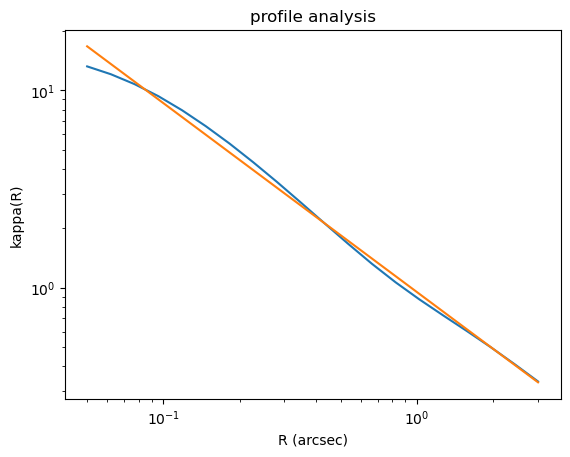

In [17]:
r = np.logspace(np.log10(0.05), np.log10(3), 20)
    
plt.loglog(r, lens_model_nfw.kappa(r, 0, kwargs_nfw))
plt.loglog(r, lens_model.kappa(r, 0, kwargs_lens))
plt.title('profile analysis')
plt.xlabel('R (arcsec)')
plt.ylabel('kappa(R)')
plt.show()

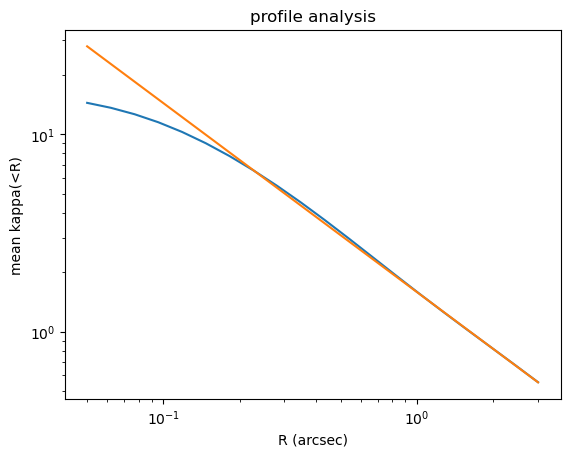

In [18]:
r = np.logspace(np.log10(0.05), np.log10(3), 20)

nfw_ms = []
pl_ms = []

for p in r:
    nfw_ms.append(np.sum(lens_profile_nfw.mass_fraction_within_radius(kwargs_nfw, 0, 0, p)))
    pl_ms.append(lens_profile.mass_fraction_within_radius(kwargs_lens, 0, 0, p))
    
plt.loglog(r, nfw_ms)
plt.loglog(r, pl_ms)
plt.title('profile analysis')
plt.xlabel('R (arcsec)')
plt.ylabel('mean kappa(<R)')
plt.show()

In [11]:
q = 0.88

e = (1 - q) / (1 + q)

(1 - e), (1 + e), np.sqrt(q), 1 / np.sqrt(q),

(0.9361702127659575, 1.0638297872340425, 0.938083151964686, 1.0660035817780522)

## Get ellipticity of NFW convergence

In [67]:
from lenstronomy.LensModel.lens_model import LensModel
from lenstronomy.Util.param_util import phi_q2_ellipticity
from mgefit.find_galaxy import find_galaxy
from mgefit.mge_fit_sectors_regularized import mge_fit_sectors_regularized
from mgefit.sectors_photometry import sectors_photometry



def get_nfw_ellipticity(q, plot=False):
    """
    """
    nfw_model = LensModel(['NFW_ELLIPSE'])

    kappa_s, r_s, mass_to_light, _ = 5.49489633e-02, 2.14856643e+01, 2.01093181e+00, 7.31653932e-01
    alpha_rs = 4 * kappa_s * r_s * (np.log(0.5) + 1.)

    e1, e2 = phi_q2_ellipticity(0, q)


    kwargs_nfw = [{'Rs': r_s, 'alpha_Rs': alpha_rs, 'center_x': 0., 'center_y': 0., 
                   'e1': e1, 'e2': e2
                  }]

    w = 1.65/np.sqrt(7.31653932e-01) / np.sqrt(2)

    x, y = np.meshgrid(
            np.linspace(-w, w, 500), # x-axis points to negative RA
            np.linspace(-w, w, 500),
        )


    convergence = nfw_model.kappa(x, y, kwargs_nfw)
    
    if plot:
        plt.matshow(np.log10(convergence), cmap='cubehelix', origin='lower')
        plt.show()

    
    img = convergence

    scale = np.abs(x[0, 1] - x[0, 0])  # arcsec/pixel
    minlevel = 1e-49 # counts/pixel
    ngauss = 20

    sigmapsf = 0     # In pixels
    normpsf = 1  # total(normpsf)=1


    # Here we use FIND_GALAXY directly inside the procedure. Usually you may want
    # to experiment with different values of the FRACTION keyword, before adopting
    # given values of Eps, Ang, Xc, Yc.
    
    f = find_galaxy(img, fraction=0.3, plot=plot, quiet=(not plot))
    if plot:
        plt.show()

    return 1 - f.eps

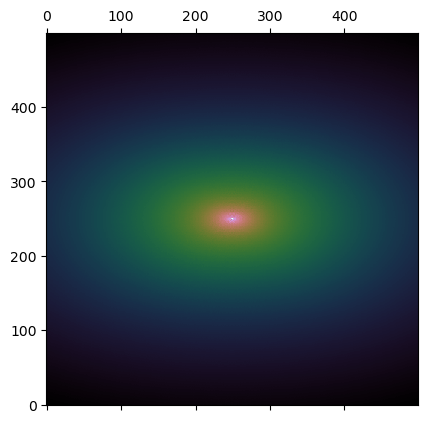

 Pixels used: 75000
 Peak Img[j, k]: 250 250
 Mean (j, k): 249.48 249.44
 Theta (deg): 0.0
 Astro PA (deg): 90.0
 Eps: 0.458
 Major axis (pix): 207.7


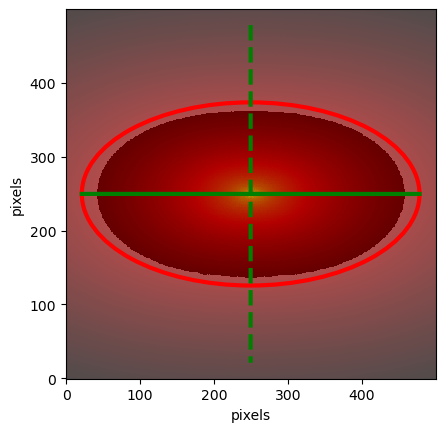

0.5423325162892177

In [68]:
get_nfw_ellipticity(7.31653932e-01, True)

Text(0, 0.5, 'q_kappa')

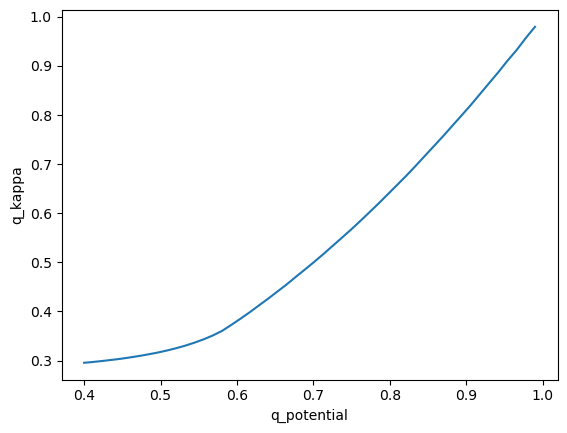

In [70]:
q_mean, q_std = 0.731485773379816, 0.045738898190616675
sigma_range = 5
potential_qs = np.linspace(0.4, 0.99, 50) #q_mean-sigma_range*q_std, q_mean+sigma_range*q_std, 50)

kappa_qs = []

for q in potential_qs:
    kappa_qs.append(get_nfw_ellipticity(q, False))
    
plt.plot(potential_qs, kappa_qs)
plt.xlabel('q_potential')
plt.ylabel('q_kappa')

In [71]:
print(kappa_qs)

[0.2955890109246895, 0.29729484339412804, 0.2993046678215645, 0.30148731960847175, 0.3037781629679952, 0.30656181091958756, 0.30944101265858914, 0.3128449794390762, 0.31637187278135614, 0.32057430074818316, 0.32525183117191303, 0.3304782178184469, 0.33659904664300166, 0.34335555305827037, 0.3512799441223804, 0.36060271442019076, 0.37271593485449106, 0.3853688300669107, 0.39850632018999277, 0.4123670033003701, 0.426085510857797, 0.4405323411004247, 0.4549318199526641, 0.4703884811354565, 0.48553317127707907, 0.5009183370787333, 0.5168215047382049, 0.5334143339607527, 0.5499198443785049, 0.5666119560282026, 0.5839594642663198, 0.6018951710415525, 0.6198941913485861, 0.6385840422577401, 0.6573510262452367, 0.6761701874779739, 0.6958430091624018, 0.7161996832176144, 0.7364049180144907, 0.7566471634820947, 0.7777133348551333, 0.7987235524003334, 0.8198882232045268, 0.8422204547523987, 0.8646648092383161, 0.8868192016046453, 0.9103444426772708, 0.9322329992014406, 0.9567554192086308, 0.97965